In [1]:
# gstools can also be used to generate random fields, but does not perform the same with GMET
# gstools is not used 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import gstools as gs

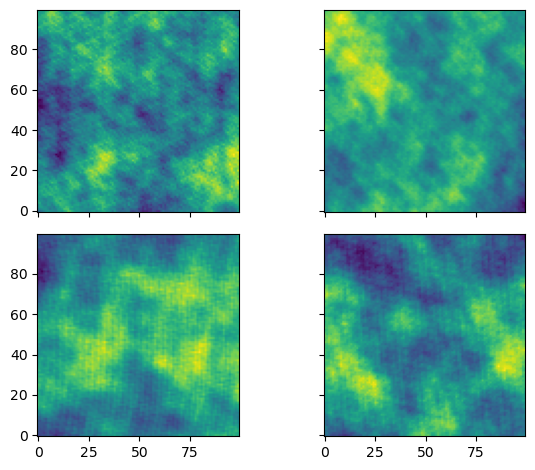

In [3]:
# Exponential

x = y = np.arange(0, 10, 0.1)

model = gs.Exponential(latlon=True, var=1, len_scale=300, rescale=gs.EARTH_RADIUS) 
srf = gs.SRF(model)
srf.set_pos([x, y], "structured")

ens_no = 4
for i in range(ens_no):
    srf(seed=i, store=f"field{i}")
    
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(ens_no):
    ax[i].imshow(srf[i].T, origin="lower")
    # ax[i].hist(srf[i].flatten())
    
plt.tight_layout()
plt.show()

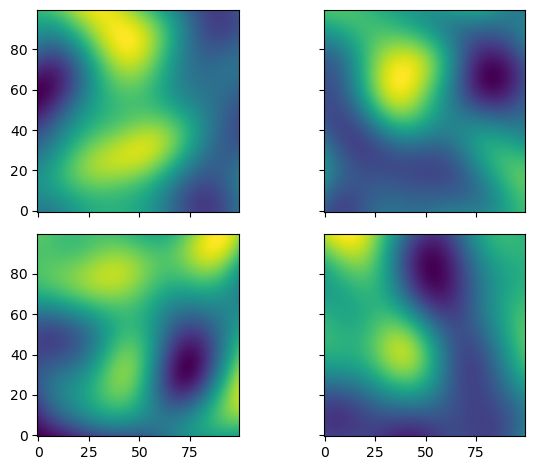

In [4]:
# Gaussian + latlon

x = y = np.arange(0, 10, 0.1)

model = gs.Gaussian(latlon=True, var=1, len_scale=300, rescale=gs.EARTH_RADIUS) 
srf = gs.SRF(model)
srf.set_pos([x, y], "structured")

ens_no = 4
for i in range(ens_no):
    srf(seed=i, store=f"field{i}")
    
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(ens_no):
    ax[i].imshow(srf[i].T, origin="lower")
    # ax[i].hist(srf[i].flatten())
    
plt.tight_layout()
plt.show()

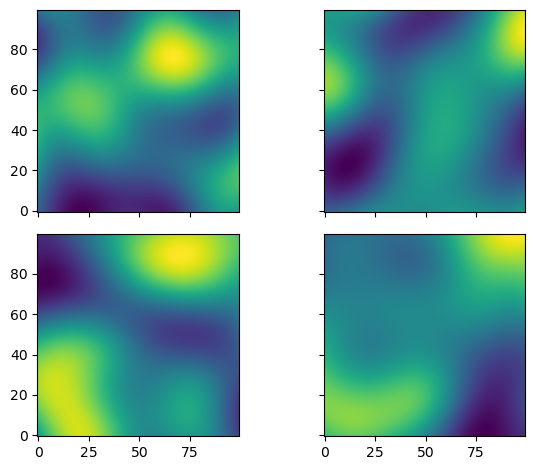

In [5]:
# Gaussian without latlon

x = y = np.arange(0, 10, 0.1)

model = gs.Gaussian(dim=2, var=1, len_scale=3) 
srf = gs.SRF(model)
srf.set_pos([x, y], "structured")

ens_no = 4
for i in range(ens_no):
    srf(seed=i, store=f"field{i}")
    
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(ens_no):
    ax[i].imshow(srf[i].T, origin="lower")
    # ax[i].hist(srf[i].flatten())
    
plt.tight_layout()
plt.show()

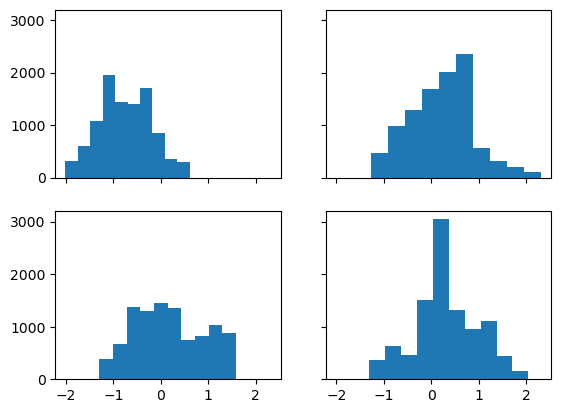

In [6]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(ens_no):
    ax[i].hist(srf[i].flatten())
plt.show()

/opt/anaconda3/envs/PyGMET/lib/python3.10/site-packages/gstools/field/plot.py:367: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


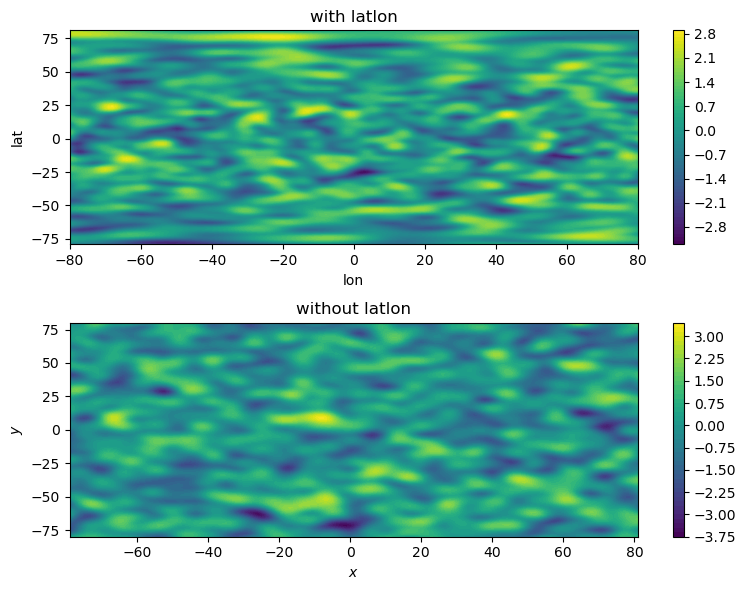

In [7]:
# global compare "without latlon" and "with latlon"

lat = range(81, -80, -1)
lon = range(-80, 81)
lenscale = 500 # km

fig, ax = plt.subplots(2, 1, figsize=[8, 6])


model = gs.Gaussian(latlon=True, var=1, len_scale=lenscale, rescale=gs.EARTH_RADIUS)
srf = gs.SRF(model, seed=1234)
field = srf.structured((lat, lon))
srf.plot(ax=ax[0])
ax[0].set_title('with latlon')

model = gs.Gaussian(dim=2, var=1, len_scale=lenscale/100) # ~ 1 deg = 100 km
srf = gs.SRF(model, seed=1234)
field = srf.structured((lat, lon))
srf.plot(ax=ax[1])
ax[1].set_title('without latlon')

plt.tight_layout()
plt.show()